# SEARCH THROUGHT FACEBOOK API

This notebook it will show how to capture data from facebook api

In [1]:
import json
import facebook
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

## Here's the token, Facebook api

In [3]:
token = 'EAAI5xneADUoBADeZASZA14FZCoofbwbLII5DpvBMa6lJLZBivbA4zot8RmnPagZAD3gAfu696PEcDc7EhYKd2MVdoZBcCXblVtAzZA1DcBtA2ckCXZCxvXZCj8wZBrVgTRxL26OxCbgP1bAdaIjNQLZCbZBrmMzZBj0UhnMlZBRKQ0jUBgdydWSNgPvapHGx6QOcFnMxsZD'

In [4]:
graph = facebook.GraphAPI(token)
# We're accessing the api for information

In [5]:
search = ['first_name', 'likes']
profile = graph.get_object('me',fields='likes.limit(1000){category}')
# This is for acces of each category

# profile['likes']['data'][1]['category']

categories = []

for category in range(len(profile['likes']['data'])):
    categories.append(profile['likes']['data'][category]['category'])


In [6]:
# categories # this show the categories
import seaborn as sns

my_likes = DataFrame({'num': range(len(categories)), 'cat':categories})
my_likes = my_likes.groupby('cat').sum().reset_index()
likes_mean = my_likes.mean(skipna=False, axis=0)
hola = my_likes.copy()
likes_mean

num    93.238095
dtype: float64

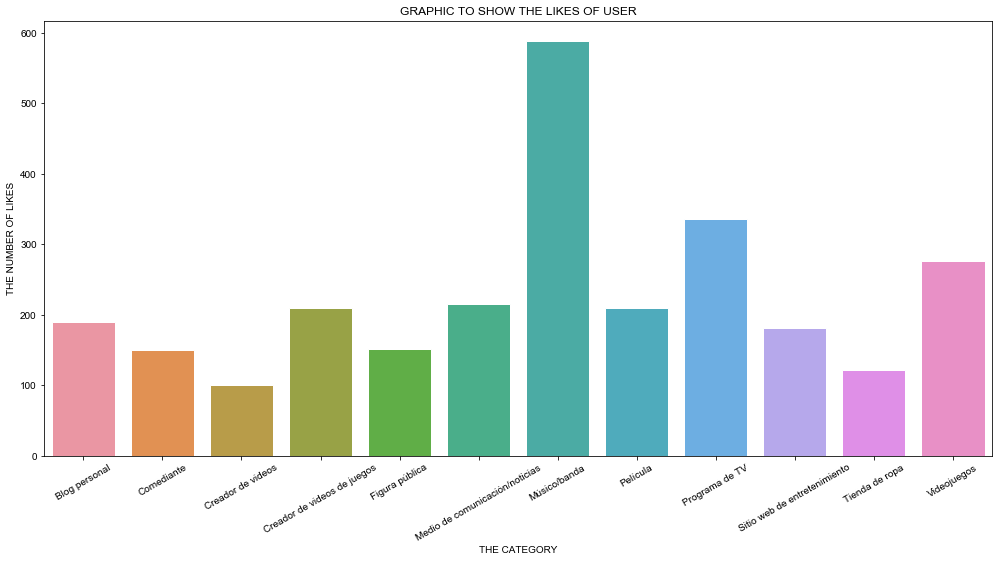

In [7]:
import seaborn as sns

my_likes = DataFrame({'num': range(len(categories)), 'cat':categories})
# skipna exclude the None values
my_likes = my_likes.groupby('cat').sum()

# only chosee values up of the 
# wrong way
#likes = my_likes[my_likes.apply(lambda x: x['num'] >= likes_mean, axis=1)]
#likes = my_likes.loc[my_likes.num >= likes_mean]

# good way
likes = my_likes.copy()
likes_mean = likes['num'].mean()
likes = likes[likes.num >= likes_mean]
likes = likes.reset_index()

likes['id'] = range(len(likes))
f, ax = plt.subplots(figsize=(17, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data=likes, x ='id', y='num')
locs, labels = plt.xticks()
ax.set(xlabel='THE CATEGORY', ylabel='THE NUMBER OF LIKES', title='GRAPHIC TO SHOW THE LIKES OF USER')
      #xticks=list(likes['cat'].to_numpy()))#,xticks=likes['cat'])
ax.set_xticklabels(list(likes['cat'].to_numpy()), rotation=30)
plt.show()

